<a href="https://colab.research.google.com/github/jayasrisng/videoGameTrends/blob/main/Video_Game_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
video_games_data = pd.read_csv(io.BytesIO(uploaded['Video_Games.csv']))

Saving Video_Games.csv to Video_Games.csv


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Video_Games.csv'
video_games_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to confirm it's loaded correctly
print(video_games_data.head())

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

In [ ]:
# Basic information about the dataset
video_games_data.info()

# Summary statistics for numerical features
print(video_games_data.describe())

# Check for missing values
print(video_games_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
       Year

In [ ]:
# Convert 'User_Score' to numeric, setting errors='coerce' will convert non-convertible values to NaN
video_games_data['User_Score'] = pd.to_numeric(video_games_data['User_Score'], errors='coerce')

# Now you can safely compute the median, ignoring NaN values
median_score = video_games_data['User_Score'].median()

# Fill missing values in 'User_Score' with the computed median
video_games_data['User_Score'].fillna(median_score, inplace=True)

# Check if the operation was successful
print(video_games_data['User_Score'].head())

0    8.0
1    7.5
2    8.3
3    8.0
4    7.5
Name: User_Score, dtype: float64


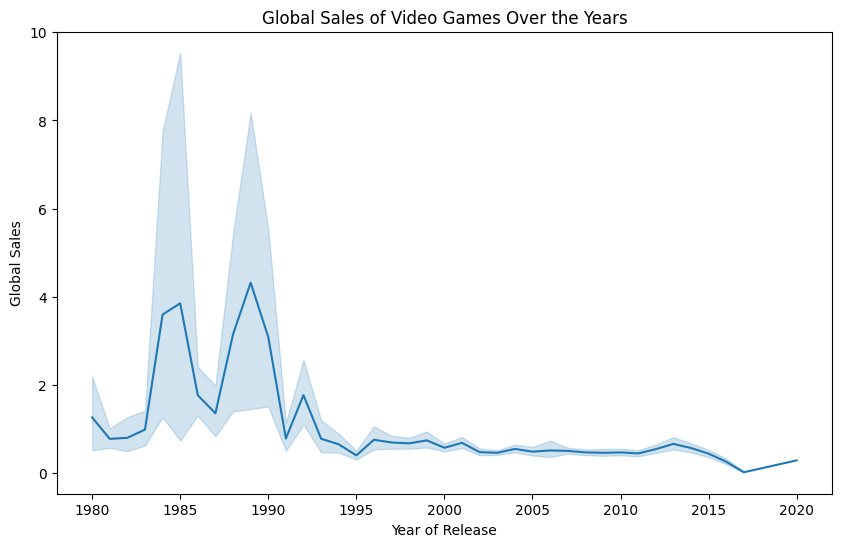

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plotting sales trends over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=video_games_data, x='Year_of_Release', y='Global_Sales')
plt.title('Global Sales of Video Games Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Global Sales')
plt.show()

Correlation Matrix:
               User_Score  User_Count  Global_Sales
User_Score      1.000000    0.027044      0.048735
User_Count      0.027044    1.000000      0.265012
Global_Sales    0.048735    0.265012      1.000000


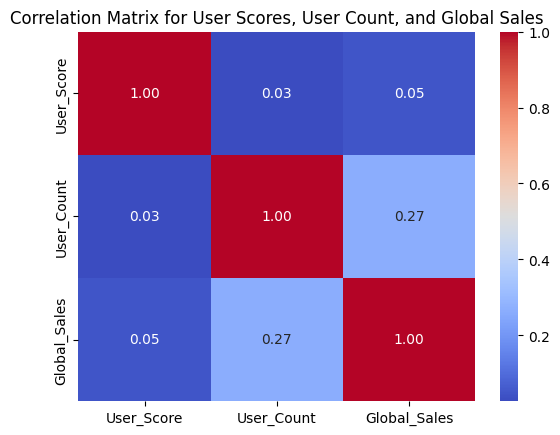

In [ ]:
# Correlation between user scores, user count, and global sales
correlation_matrix = video_games_data[['User_Score', 'User_Count', 'Global_Sales']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Visualizing the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for User Scores, User Count, and Global Sales')
plt.show()

In [ ]:
# Identify potential sensitive columns
sensitive_columns = ['User_Score', 'User_Count', 'Critic_Score', 'Critic_Count']
print(video_games_data[sensitive_columns].describe())

        User_Score    User_Count  Critic_Score  Critic_Count
count  16719.00000   7590.000000   8137.000000   8137.000000
mean       7.32978    162.229908     68.967679     26.360821
std        1.02773    561.282326     13.938165     18.980495
min        0.00000      4.000000     13.000000      3.000000
25%        7.50000     10.000000     60.000000     12.000000
50%        7.50000     24.000000     71.000000     21.000000
75%        7.50000     81.000000     79.000000     36.000000
max        9.70000  10665.000000     98.000000    113.000000


In [ ]:
import numpy as np  # Make sure to include this at the start of your script

# Adding Gaussian noise to 'User_Score'
noise = np.random.normal(0, 0.1, size=video_games_data['User_Score'].shape)
video_games_data['User_Score_Noisy'] = video_games_data['User_Score'] + noise

# Display the first few rows to see the original and noisy scores
print(video_games_data[['User_Score', 'User_Score_Noisy']].head())

   User_Score  User_Score_Noisy
0         8.0          8.078842
1         7.5          7.485703
2         8.3          8.154580
3         8.0          7.930992
4         7.5          7.362864


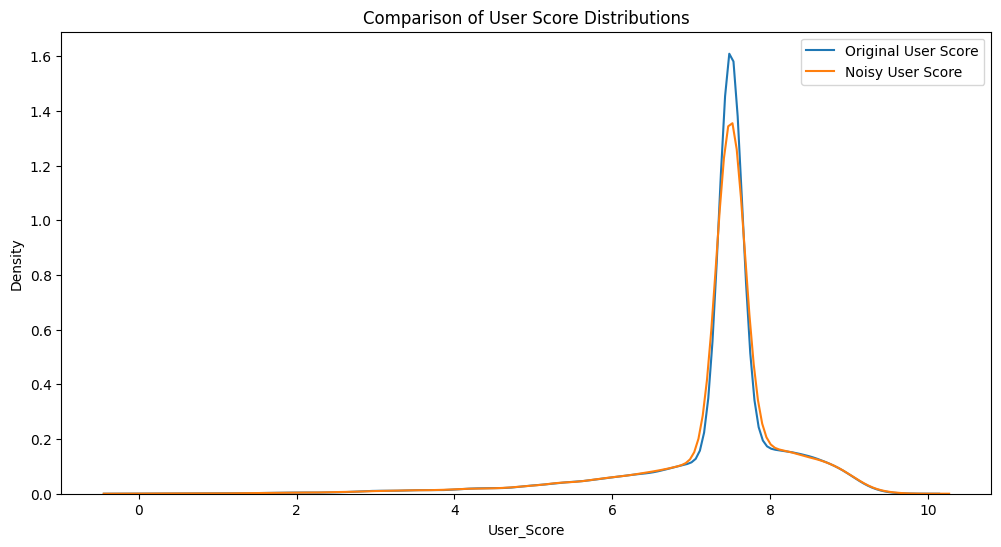

In [ ]:
# Compare distributions before and after noise addition
plt.figure(figsize=(12, 6))
sns.kdeplot(video_games_data['User_Score'], label='Original User Score')
sns.kdeplot(video_games_data['User_Score_Noisy'], label='Noisy User Score')
plt.title('Comparison of User Score Distributions')
plt.legend()
plt.show()

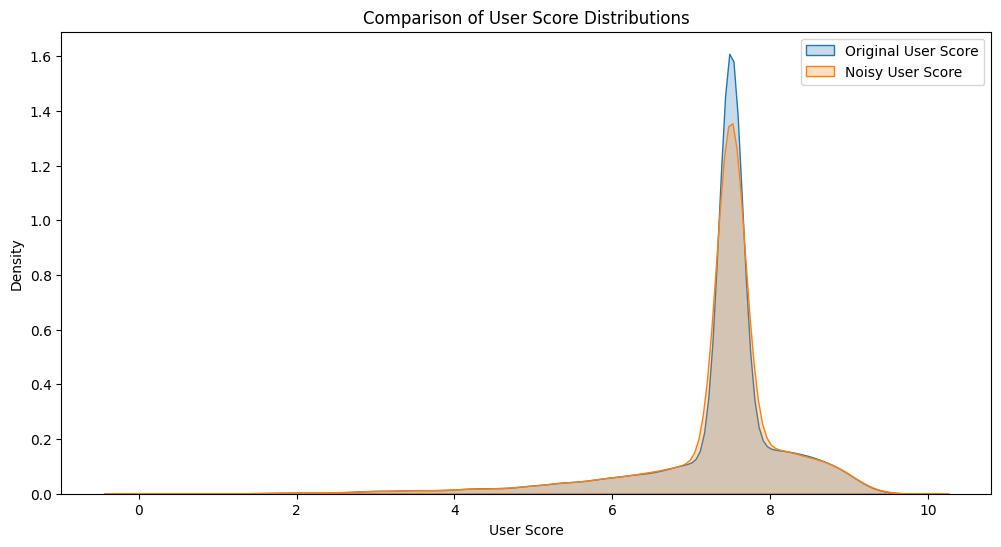

Original User Score Statistics:
 count    16719.00000
mean         7.32978
std          1.02773
min          0.00000
25%          7.50000
50%          7.50000
75%          7.50000
max          9.70000
Name: User_Score, dtype: float64
Noisy User Score Statistics:
 count    16719.000000
mean         7.328372
std          1.032649
min         -0.000887
25%          7.353978
50%          7.498207
75%          7.635270
max          9.824607
Name: User_Score_Noisy, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distributions
plt.figure(figsize=(12, 6))
sns.kdeplot(video_games_data['User_Score'], label='Original User Score', fill=True)
sns.kdeplot(video_games_data['User_Score_Noisy'], label='Noisy User Score', fill=True)
plt.title('Comparison of User Score Distributions')
plt.xlabel('User Score')
plt.ylabel('Density')
plt.legend()
plt.show()

# Calculating statistics
original_stats = video_games_data['User_Score'].describe()
noisy_stats = video_games_data['User_Score_Noisy'].describe()

print("Original User Score Statistics:\n", original_stats)
print("Noisy User Score Statistics:\n", noisy_stats)

In [ ]:
# Correlation before noise addition
original_corr = video_games_data[['User_Score', 'Global_Sales']].corr()

# Correlation after noise addition
noisy_corr = video_games_data[['User_Score_Noisy', 'Global_Sales']].corr()

print("Original Correlations:\n", original_corr)
print("Noisy Correlations:\n", noisy_corr)


Original Correlations:
               User_Score  Global_Sales
User_Score      1.000000      0.048735
Global_Sales    0.048735      1.000000
Noisy Correlations:
                   User_Score_Noisy  Global_Sales
User_Score_Noisy            1.0000        0.0478
Global_Sales                0.0478        1.0000


making req installations for generating various visualizations

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Genre Distribution

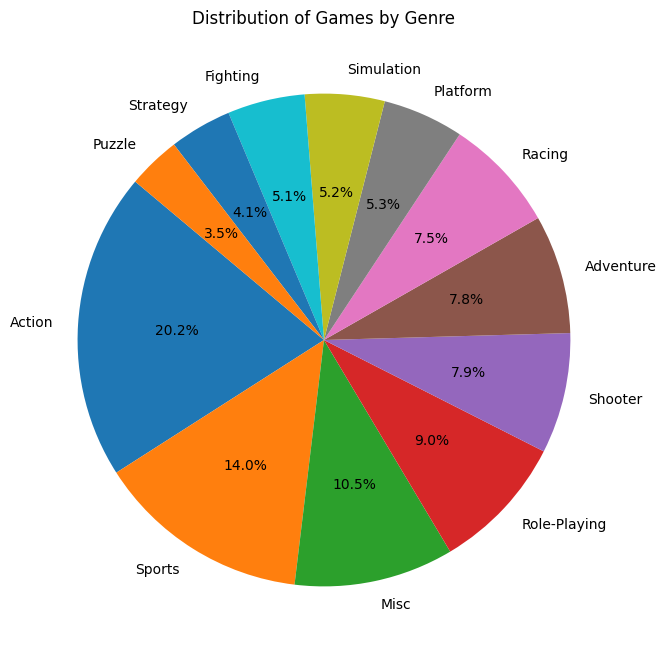

In [ ]:
genre_counts = video_games_data['Genre'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Games by Genre')
plt.show()

Platform Comparison

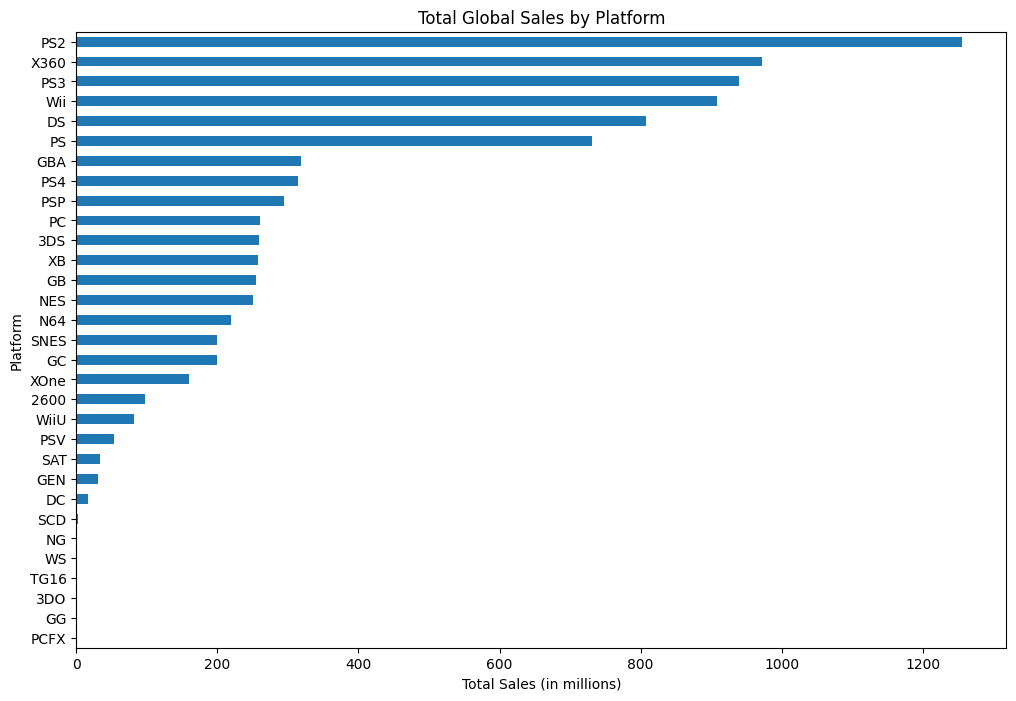

In [ ]:
platform_sales = video_games_data.groupby('Platform').sum()['Global_Sales']
plt.figure(figsize=(12, 8))
platform_sales.sort_values().plot(kind='barh')
plt.title('Total Global Sales by Platform')
plt.xlabel('Total Sales (in millions)')
plt.show()

User Scores and Critic Scores Distribution

In [ ]:
video_games_data['User_Score'] = pd.to_numeric(video_games_data['User_Score'], errors='coerce')

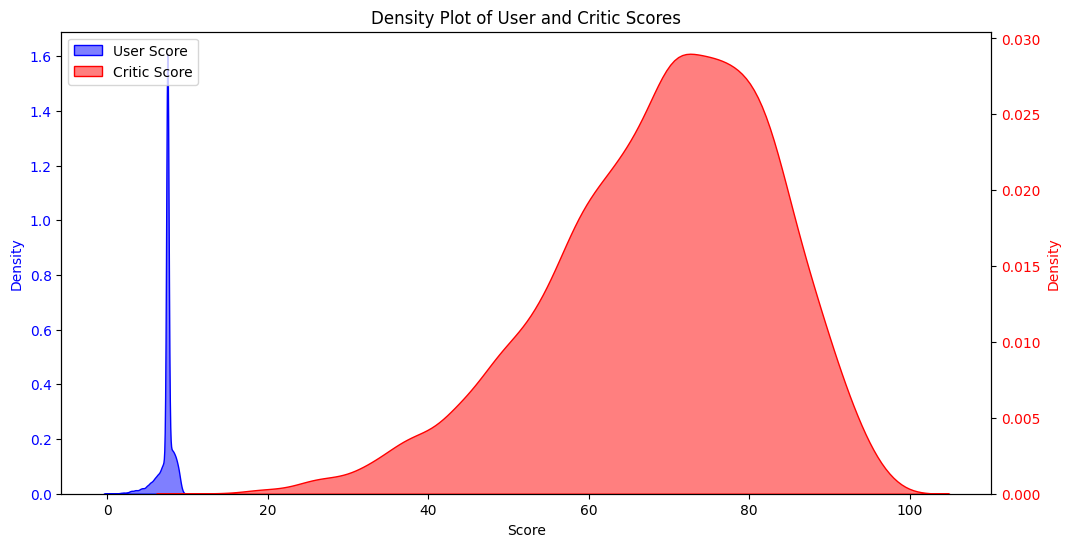

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the User Score using the left y-axis
sns.kdeplot(video_games_data['User_Score'], fill=True, label='User Score', color='blue', ax=ax1, alpha=0.5)
ax1.set_xlabel('Score')
ax1.set_ylabel('Density', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Density Plot of User and Critic Scores')

# Create a second y-axis for the Critic Score, if Critic_Score is already numeric
ax2 = ax1.twinx()
sns.kdeplot(video_games_data['Critic_Score'], fill=True, label='Critic Score', color='red', ax=ax2, alpha=0.5)
ax2.set_ylabel('Density', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding a legend that combines both plots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

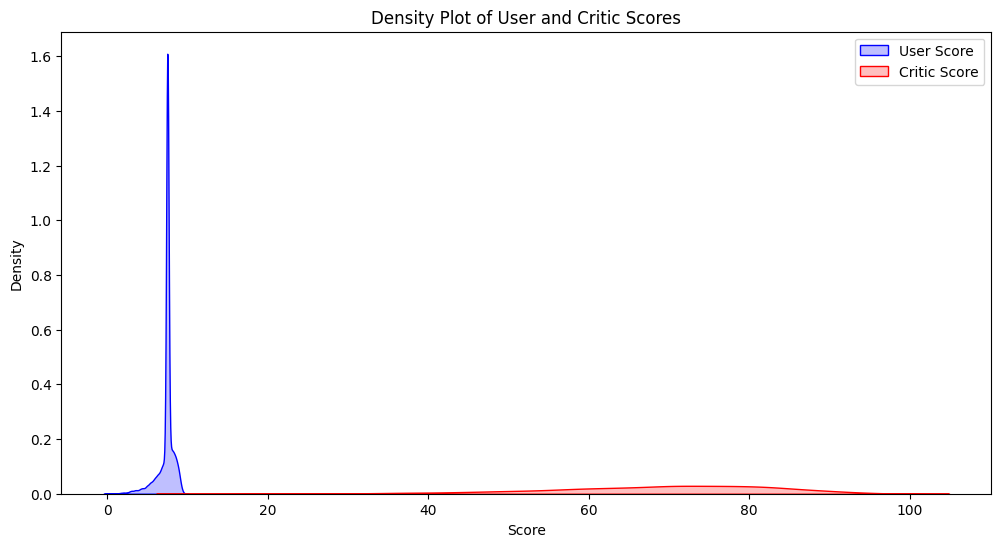

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(video_games_data['User_Score'], fill=True, label='User Score', color='blue')
sns.kdeplot(video_games_data['Critic_Score'], fill=True, label='Critic Score', color='red')
plt.title('Density Plot of User and Critic Scores')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend()
plt.show()

Top Publishers by Sales

<ipython-input-39-eb56a85ddd6f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')


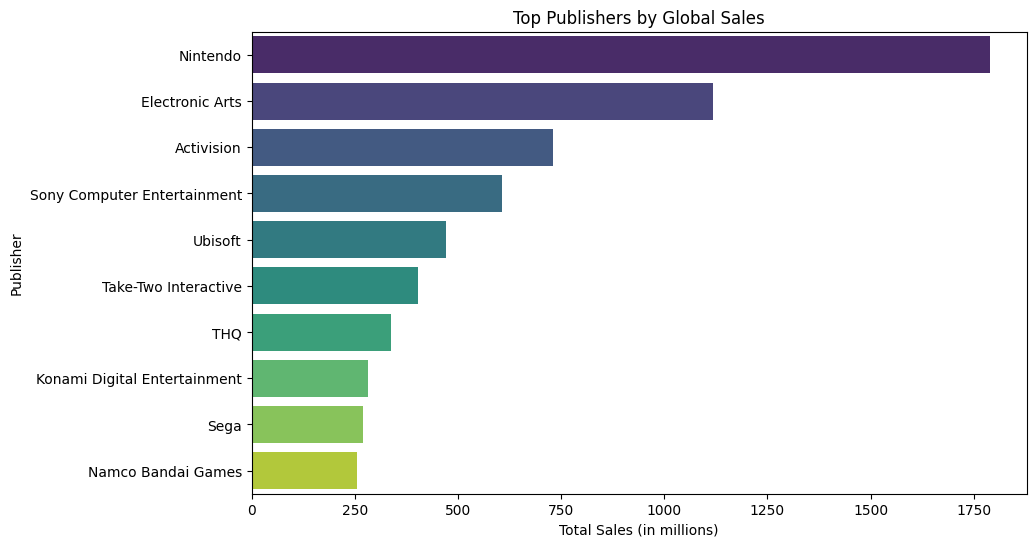

In [ ]:
top_publishers = video_games_data.groupby('Publisher').sum()['Global_Sales'].nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')
plt.title('Top Publishers by Global Sales')
plt.xlabel('Total Sales (in millions)')
plt.show()

Bubble Chart: Sales by Platform and Genre

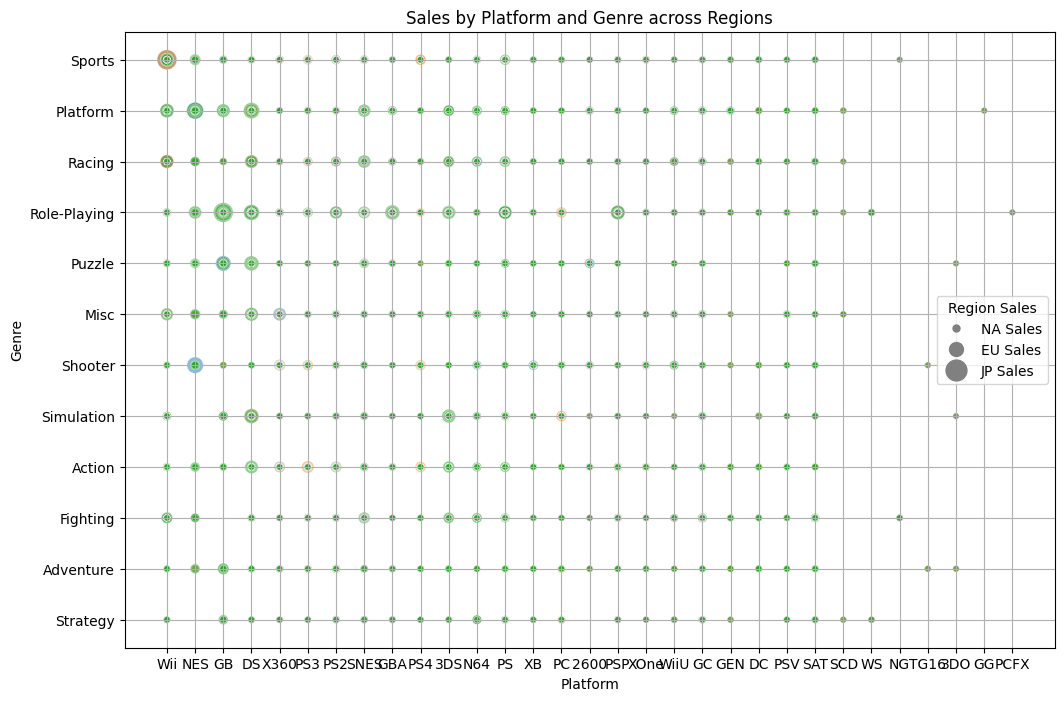

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Plotting each region separately to handle legends manually
for region in ['NA_Sales', 'EU_Sales', 'JP_Sales']:
    sns.scatterplot(data=video_games_data, x='Platform', y='Genre', size=region, sizes=(20, 200), alpha=0.5)

# Adding custom legends manually
labels = ['NA Sales', 'EU Sales', 'JP Sales']
handles = [plt.Line2D([], [], marker='o', color='gray', markersize=5 + (i * 5), linestyle='', label=label) for i, label in enumerate(labels)]
plt.legend(title='Region Sales', handles=handles, labels=labels)

plt.title('Sales by Platform and Genre across Regions')
plt.xlabel('Platform')
plt.ylabel('Genre')
plt.grid(True)
plt.show()

3D Scatter Plot: Sales, User Score, and Critic Score by Genre

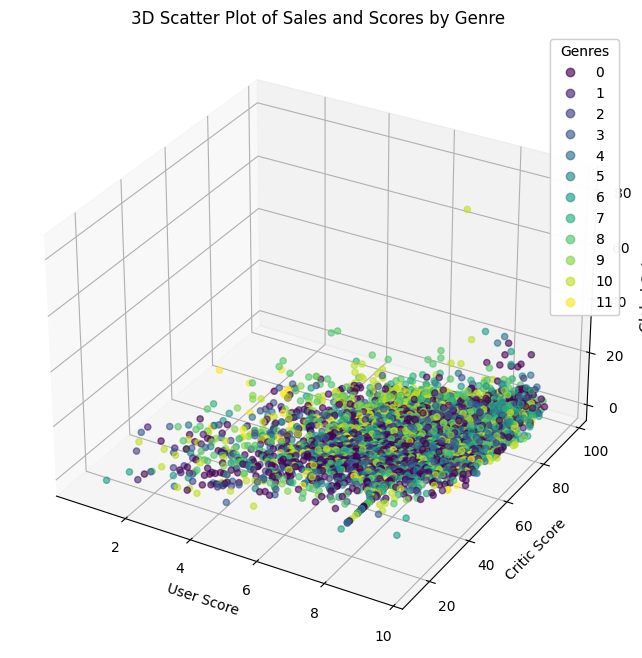

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(video_games_data['User_Score'], video_games_data['Critic_Score'], video_games_data['Global_Sales'], c=video_games_data['Genre'].astype('category').cat.codes, cmap='viridis', alpha=0.6)

# Adding labels and title
ax.set_xlabel('User Score')
ax.set_ylabel('Critic Score')
ax.set_zlabel('Global Sales')
ax.set_title('3D Scatter Plot of Sales and Scores by Genre')

# Legend with genre
legend = ax.legend(*scatter.legend_elements(), title="Genres")
ax.add_artist(legend)

plt.show()

 Stacked Bar Chart: Regional Sales by Top Genres

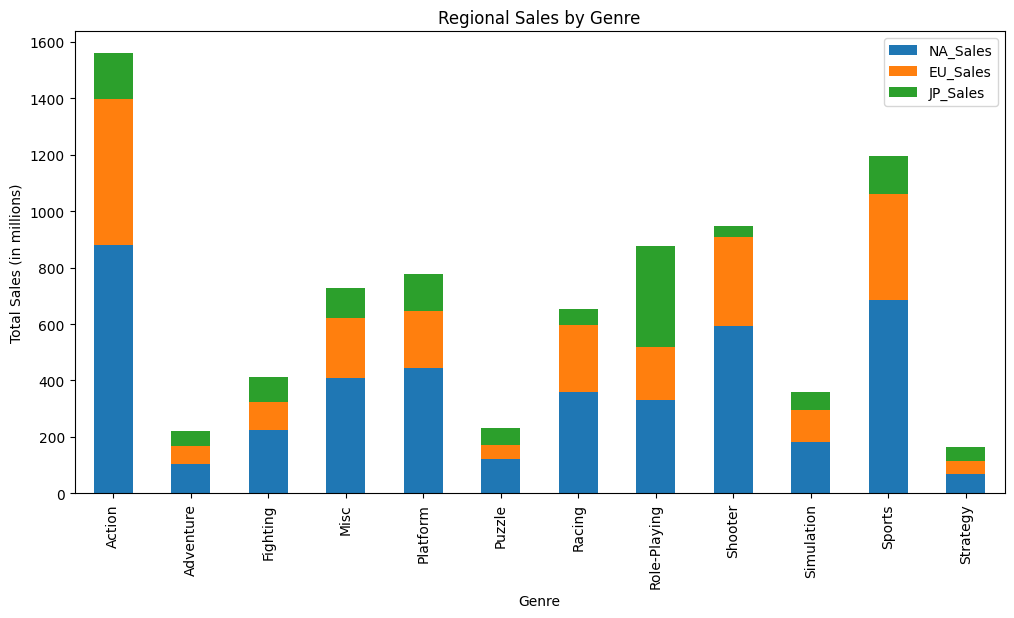

In [ ]:
# Aggregating sales by genre
genre_sales = video_games_data.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()

# Creating a stacked bar chart
genre_sales.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Regional Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.show()

Heatmap: Correlation among Sales, Scores, and User Count

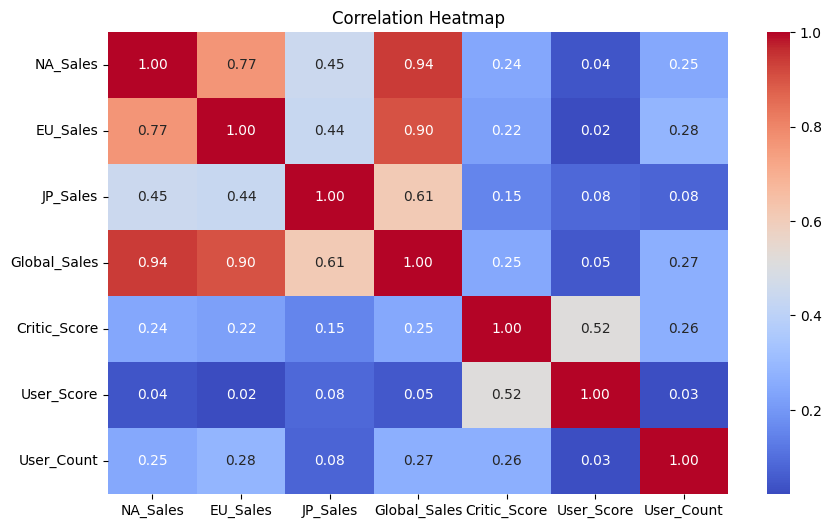

In [ ]:
# Selecting relevant columns
data_subset = video_games_data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales', 'Critic_Score', 'User_Score', 'User_Count']]

# Computing the correlation matrix
corr = data_subset.corr()

# Generating a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Pair Plot: Relationships among Sales, Scores, and User Count

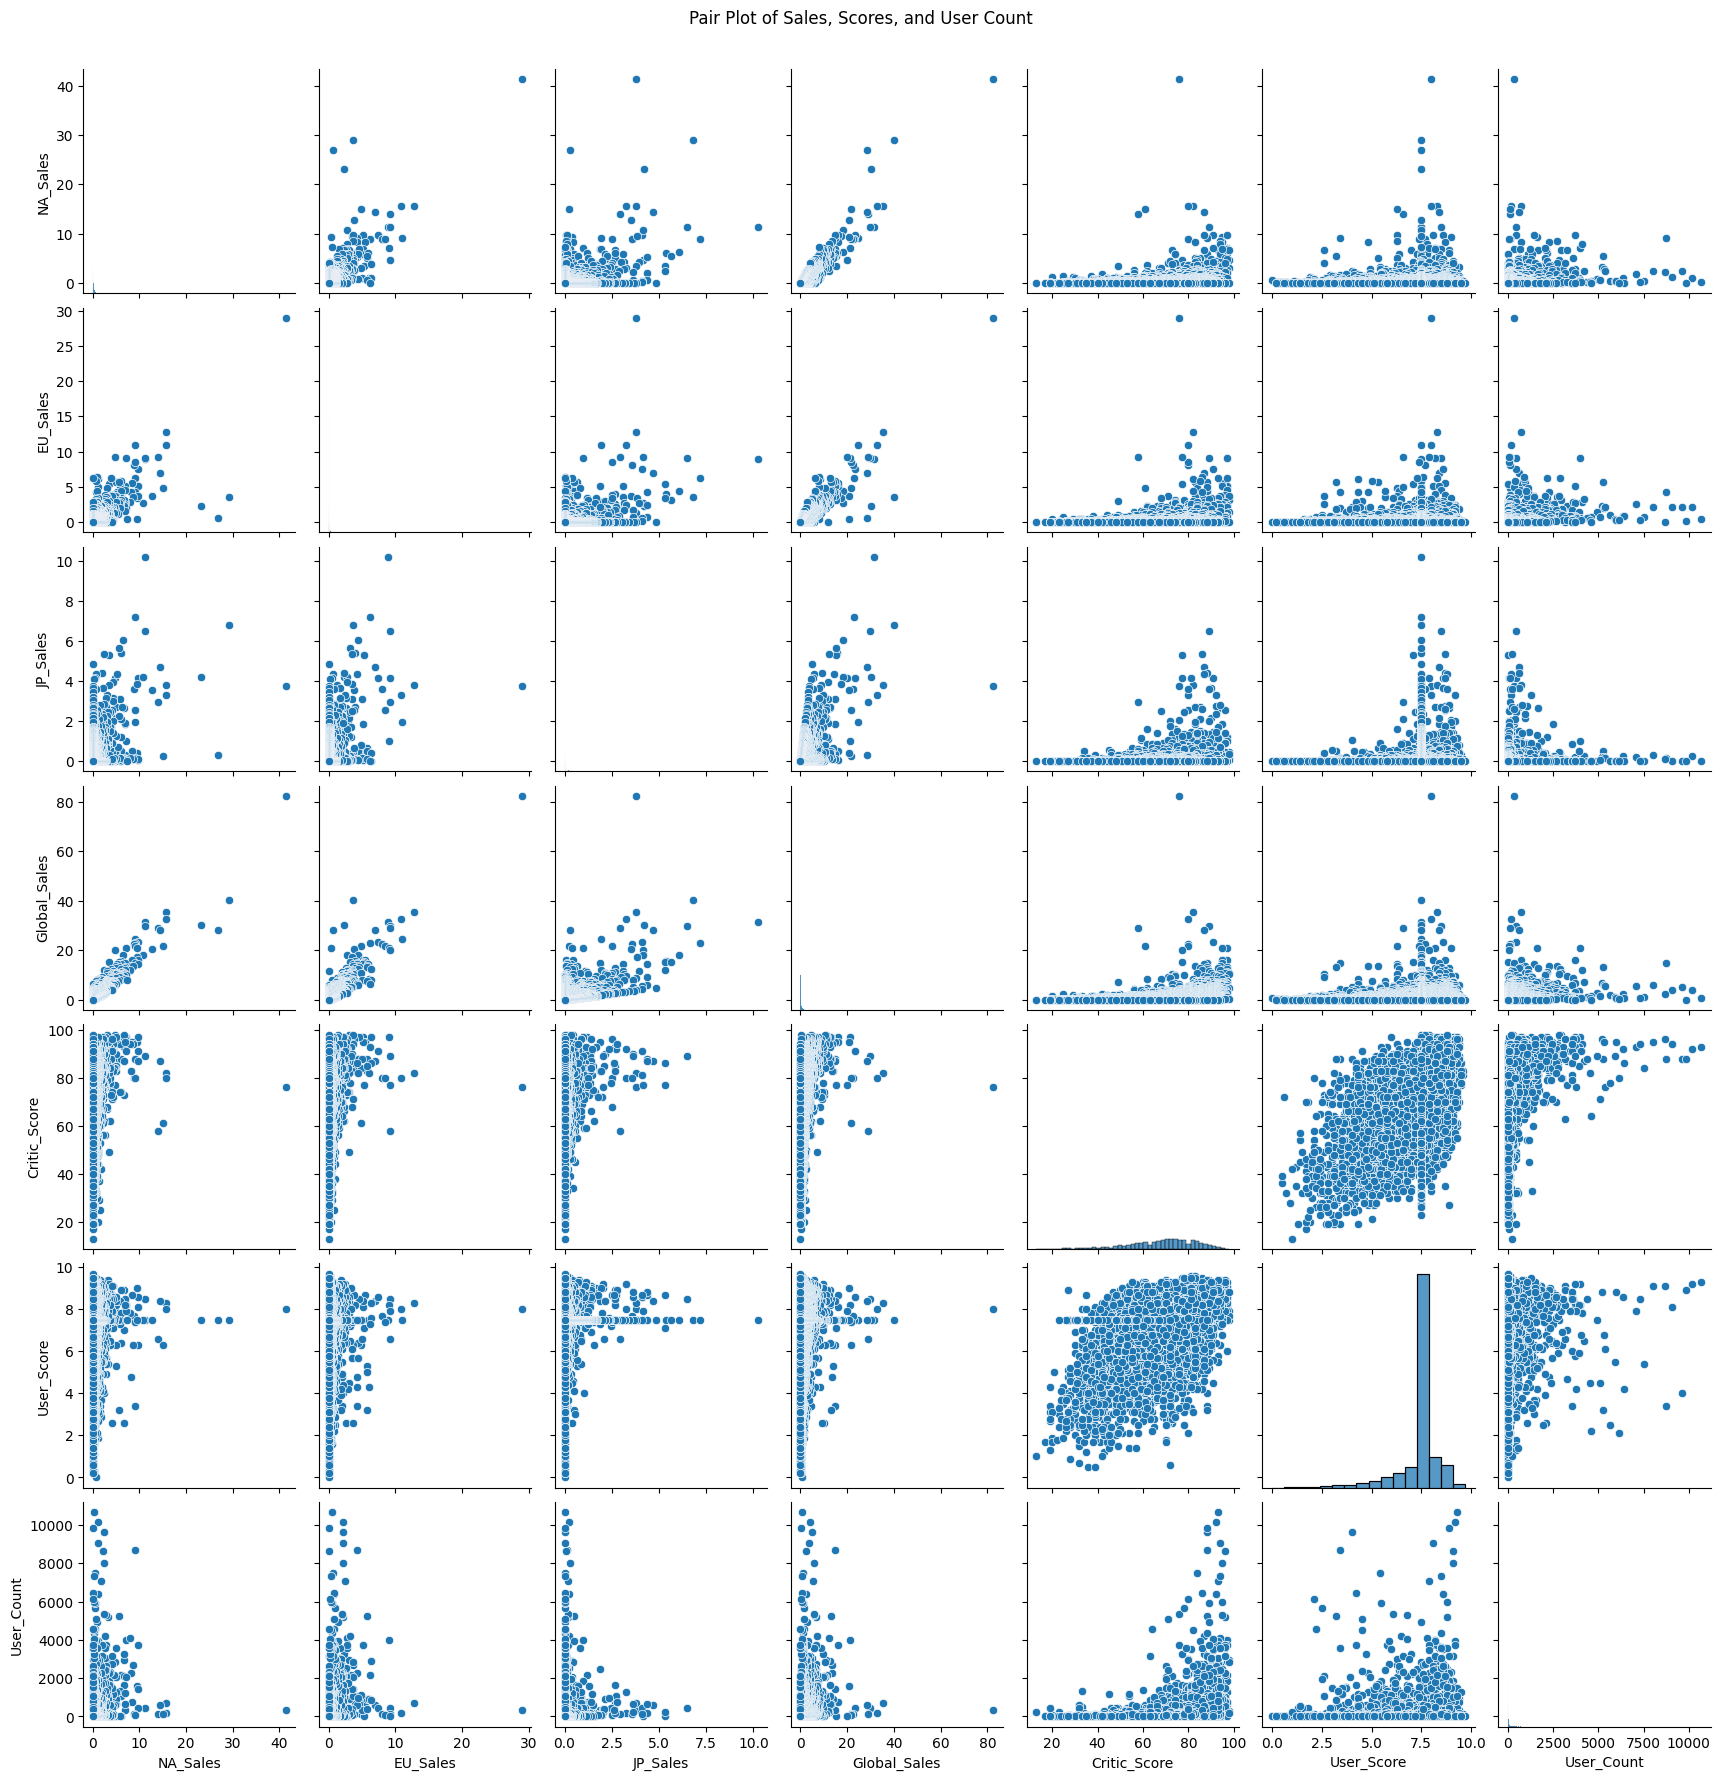

In [ ]:
# Using a pair plot to explore the relationships
sns.pairplot(data_subset)
plt.suptitle('Pair Plot of Sales, Scores, and User Count', y=1.02)
plt.show()